# TODOs

**EDA**
- Check whether features and sales dates match
- Check dates occurrences per store
- Plot features over time (with holidays)
- Plot sales over time (with holidays)
- Plot sales correlations

**Modelling Ideas**
- Implement evaluation metric
- Have benchmarks (random and maybe winner)
- train test split in time
- Use simple and complex model
- Explain the models










# Description


# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, colors
sns.set(style='whitegrid')

# EDA

## Loading Data

In [2]:
base_path = '../data/'

In [3]:
stores = pd.read_csv(base_path + 'stores.csv')
features = pd.read_csv(base_path + 'features.csv')
train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')

## Stores
The first dataset we look at is the stores dataset. It consists of 3 columns, **Store**, which is just the store identifier, **Type** and **Size**. There are 3 types of Stores: A, B and C. Moreover, the sizes are related to the types, where A have greater sizes, followed by B and C.
There is a total of 45 stores.

In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
stores.Store.value_counts().value_counts()

1    45
Name: Store, dtype: int64

In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Type

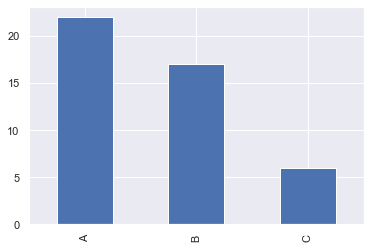

In [7]:
stores.Type.value_counts().plot.bar()

### Size

If we plot the Sizes distributions by store Types, we observe that they are obviously related.

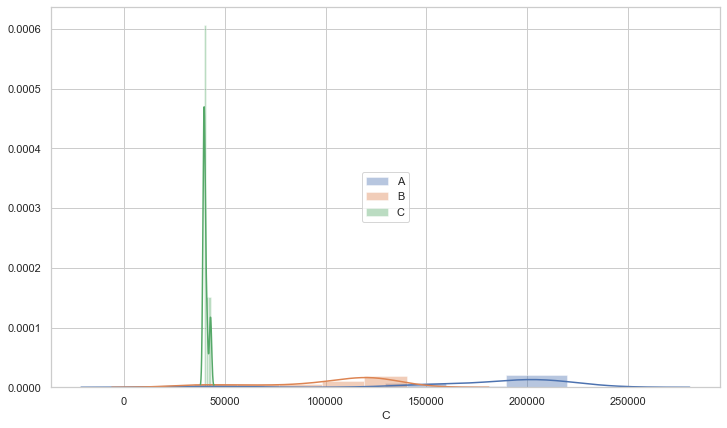

In [199]:
plt.figure(figsize=(12,7))
stores.groupby('Type').Size.apply(lambda x: sns.distplot(x,label=x.name))
plt.legend(loc='center')
plt.set_xlabel= 'bla'

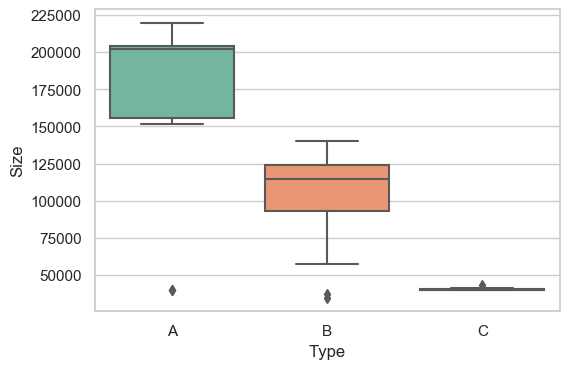

In [198]:
plt.figure(dpi=100)
sns.boxplot(x='Type', y='Size',data=stores, palette='Set2')

In [57]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

## Features
As described in the page of the challenge, the features dataset consists of following columns:

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

**Holidays**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [49]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


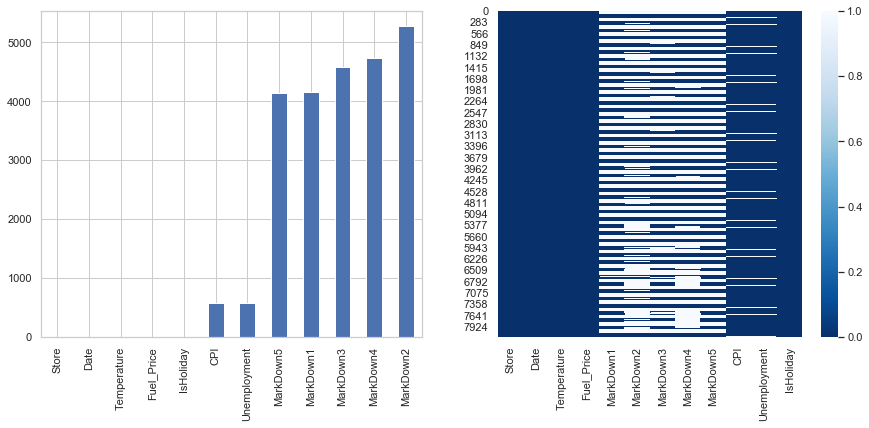

In [197]:
f, axs = plt.subplots(1,2,figsize=(15,6))
features.isna().sum().sort_values().plot.bar(ax=axs[0])
sns.heatmap(features.isna(),ax=axs[1], cmap='Blues_r')

In [92]:
(pd.crosstab(index=features.Store, columns = features.Date)>0).sum(axis=1).value_counts()

182    45
dtype: int64

In [195]:
def plot_time_evolution(df, col, 
                        date_col='Date', cmap='viridis', ax=None):
    if ax is None:
        f, ax = plt.subplots(1,1,figsize=(30,7))

    cmap = cm.get_cmap(cmap)
    norm = colors.Normalize(vmin=df.Store.min(), vmax=df.Store.max())

    _ = df.set_index(date_col)\
                .groupby('Store')\
                [col]\
                .apply(lambda x: ax.plot(x,
                                          label=x.name, 
                                          c=cmap(norm(x.name)),
                                          alpha=0.7))

    ax.set_ylabel(col,fontsize=15)
    ax.legend(loc='upper right',ncol=2, bbox_to_anchor=(1.030, 1))

    _ = plt.xticks(rotation=90)
    
    return ax

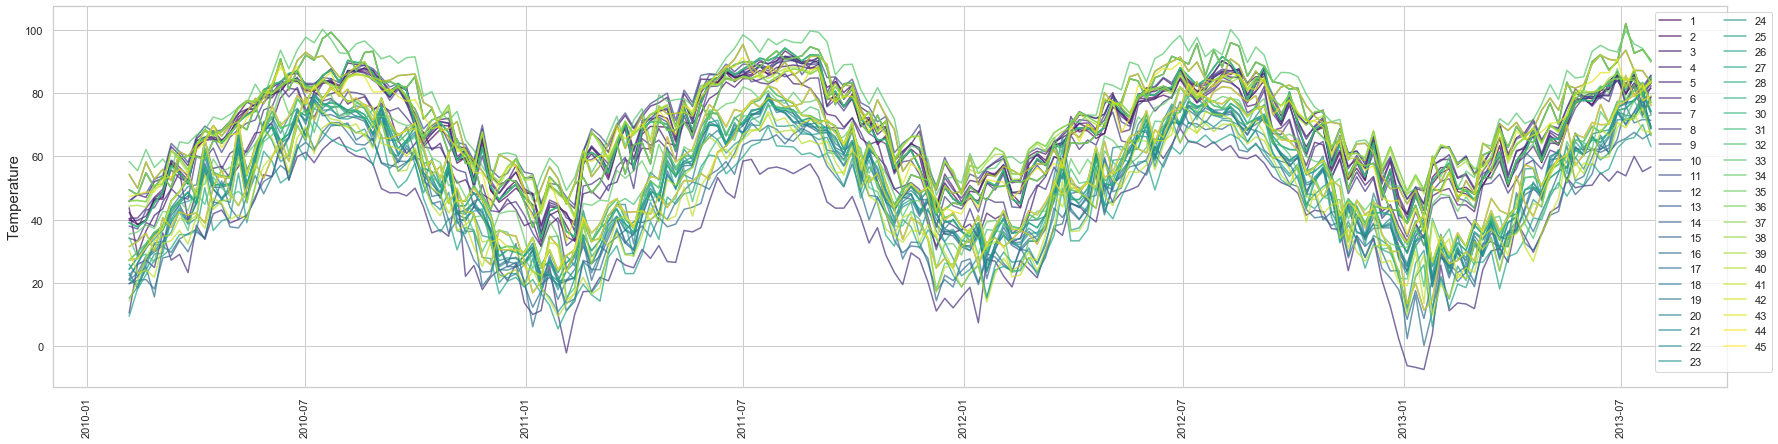

In [196]:
ax = plot_time_evolution(features,'Temperature')

## Train

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [68]:
train.

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


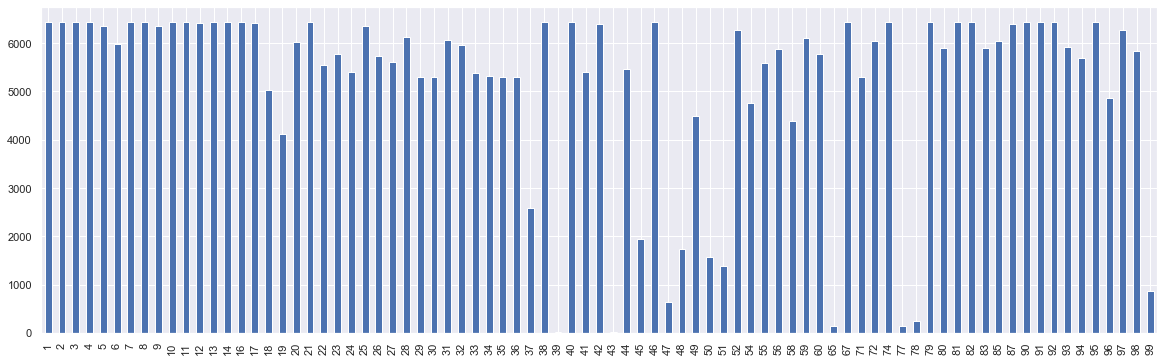

In [62]:
plt.figure(figsize=(20,6))
train.Dept.value_counts().sort_index().plot.bar()

## Sales